In [1]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
from statsmodels.nonparametric.smoothers_lowess import lowess
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv('sredjeni_kurs.csv', parse_dates=True)
df.head

<bound method NDFrame.head of      APPLICATION DATE  MIDDLE EXCHANGE RATE
0          2003-01-01               61.5845
1          2003-01-02               61.5845
2          2003-01-03               61.5845
3          2003-01-04               61.6615
4          2003-01-05               61.6615
...               ...                   ...
7665       2023-12-27              117.1587
7666       2023-12-28              117.1504
7667       2023-12-29              117.1737
7668       2023-12-30              117.1737
7669       2023-12-31              117.1737

[7670 rows x 2 columns]>

In [3]:
df['APPLICATION DATE'].dtype

dtype('O')

In [4]:
# Konvertujte kolonu 'APPLICATION DATE' u tip datuma
df['APPLICATION DATE'] = pd.to_datetime(df['APPLICATION DATE'])

# Izdvajanje godine iz datuma
df['Year'] = df['APPLICATION DATE'].dt.year

# Grupisanje po godinama i izračunavanje srednjeg kursa
yearly_avg_exchange_rate = df.groupby('Year')['MIDDLE EXCHANGE RATE'].mean().reset_index()

In [5]:
yearly_avg_exchange_rate

,Year,MIDDLE EXCHANGE RATE
0,2003,65.051221
1,2004,72.573294
2,2005,82.914734
3,2006,84.155963
4,2007,79.977476
5,2008,81.438118
6,2009,93.899191
7,2010,102.899310
8,2011,101.965291
9,2012,113.041480


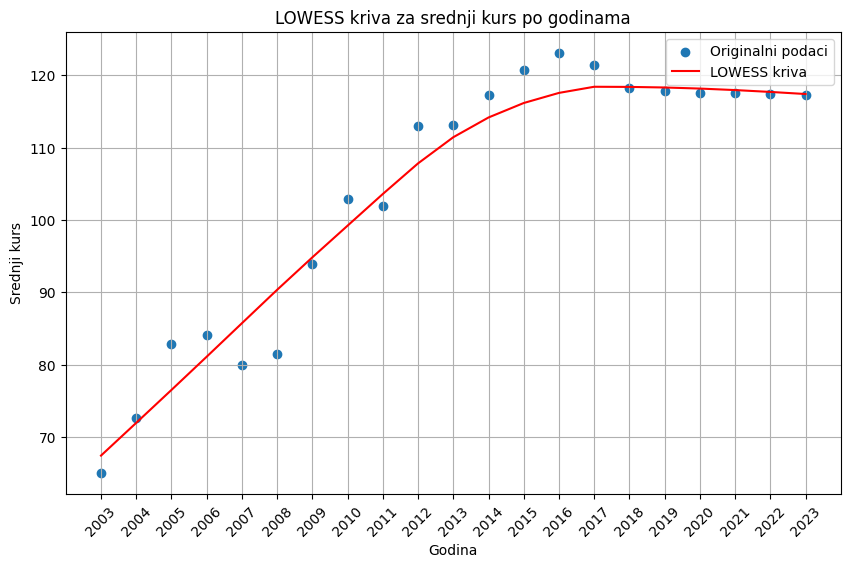

In [6]:
import statsmodels.api as sm

# Podaci za LOWESS
x = yearly_avg_exchange_rate['Year']
y = yearly_avg_exchange_rate['MIDDLE EXCHANGE RATE']

# Primena LOWESS
lowess = sm.nonparametric.lowess(y, x)

# Izdvajanje rezultata
lowess_x = lowess[:, 0]
lowess_y = lowess[:, 1]

plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Originalni podaci')
plt.plot(lowess_x, lowess_y, 'r-', label='LOWESS kriva')
plt.xlabel('Godina')
plt.ylabel('Srednji kurs')
plt.title('LOWESS kriva za srednji kurs po godinama')
plt.xticks(yearly_avg_exchange_rate['Year'].astype(int), rotation=45)
plt.legend()
plt.grid(True)
plt.show()


In [10]:
# Izračunavanje MAE i MSE
mae = mean_absolute_error(y, lowess_y)
mse = mean_squared_error(y, lowess_y)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)


Mean Absolute Error (MAE): 3.049266767433065
Mean Squared Error (MSE): 17.350752290438162


In [11]:
# Dodavanje kolone meseca u DataFrame
df['Month'] = df['APPLICATION DATE'].dt.month

# Grupisanje po godinama i mesecima i izračunavanje srednjeg kursa
yearly_monthly_avg_exchange_rate = df.groupby(['Year', 'Month'])['MIDDLE EXCHANGE RATE'].mean().reset_index()

In [12]:
yearly_monthly_avg_exchange_rate

,Year,Month,MIDDLE EXCHANGE RATE
0,2003,1,61.961458
1,2003,2,62.782329
2,2003,3,63.578174
3,2003,4,64.167287
4,2003,5,65.060252
...,...,...,...
247,2023,8,117.213965
248,2023,9,117.200760
249,2023,10,117.186429
250,2023,11,117.192683


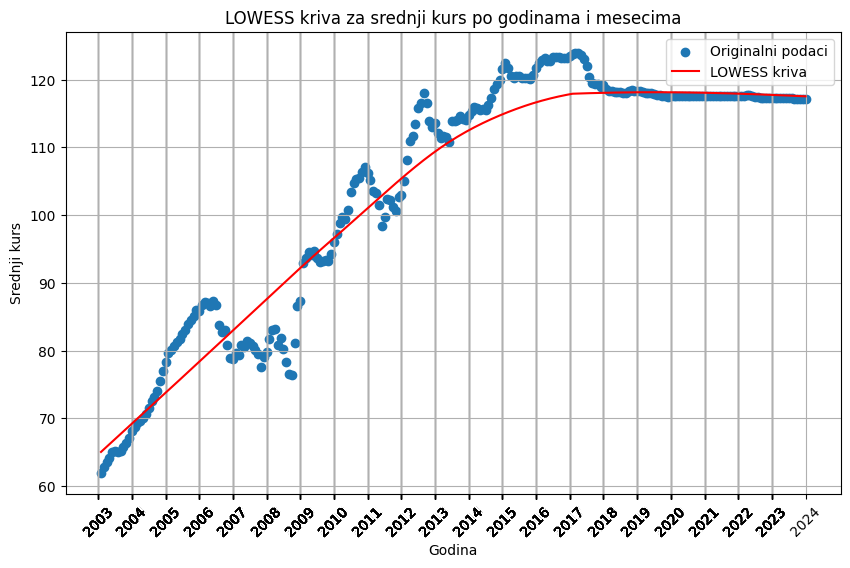

In [13]:
# Podaci za LOWESS
x = yearly_monthly_avg_exchange_rate['Year'] + yearly_monthly_avg_exchange_rate['Month'] / 12  # Kombinacija godina i meseci kao x-vrednosti
y = yearly_monthly_avg_exchange_rate['MIDDLE EXCHANGE RATE']

# Primena LOWESS
lowess = sm.nonparametric.lowess(y, x)

# Izdvajanje rezultata
lowess_x = lowess[:, 0]
lowess_y = lowess[:, 1]


plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Originalni podaci')
plt.plot(lowess_x, lowess_y, 'r-', label='LOWESS kriva')
plt.xticks(x.astype(int), rotation=45)
plt.xlabel('Godina')
plt.ylabel('Srednji kurs')
plt.title('LOWESS kriva za srednji kurs po godinama i mesecima')
plt.legend()
plt.grid(True)
plt.show()


In [14]:
# Izračunavanje MAE i MSE
mae = mean_absolute_error(y, lowess_y)
mse = mean_squared_error(y, lowess_y)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)


Mean Absolute Error (MAE): 3.049266767433065
Mean Squared Error (MSE): 17.350752290438162
